In [1]:
import pandas as pd
#dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.27_SVM/balance-scale.data') #ok, funcionou
#Escrever linha de codigo para ler o arquivo diretamente do site
dados=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                 names=['ClassName','Left-Weight','Left-Distance','Right-Weight','Right-Distance'])

In [2]:
dados

,ClassName,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [3]:
dados.dtypes

ClassName         object
Left-Weight        int64
Left-Distance      int64
Right-Weight       int64
Right-Distance     int64
dtype: object

In [4]:
dados.isnull().sum()

ClassName         0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

In [5]:
#Variaveis preditoras
dadosx=dados.drop('ClassName', axis=1)

In [6]:
#Variavel dependente
dadosy=dados['ClassName']

In [7]:
#Normalizaçao dos dados
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dadosxnorm=scaler.fit_transform(dadosx)

In [8]:
#Transformaçao dos dados da variavel dependente, de string para numerico
dadosyconvert=pd.get_dummies(dadosy)

In [37]:
#Divisao dos dados entre treino e teste
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(dadosxnorm, dadosyconvert, test_size=0.2)
#Fiz os testes com dadosx(pior) e dadosxnorm(melhor)

In [38]:
xtreino.shape

(500, 4)

In [57]:
#Carregamento dos pacotes da rede neural
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras import regularizers

In [58]:
#Criaçao dos layers da rede neural
modelo=Sequential()
modelo.add(Dense(50, input_dim=4, kernel_initializer='normal', activation='relu'))
#modelo.add(Dropout(0.05))
modelo.add(Dense(50, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(50, kernel_initializer='normal', activation='relu'))
#modelo.add(Dropout(0.05))
modelo.add(Dense(3, kernel_initializer='normal', activation='softmax'))

In [59]:
otimizador=Adam(amsgrad=True)

In [60]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'])

In [63]:
historico=modelo.fit(xtreino, ytreino, epochs=1000, batch_size=500, validation_data=(xteste, yteste), verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.2177 - acc: 0.9220 - val_loss: 0.2311 - val_acc: 0.8960
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2178 - acc: 0.9220 - val_loss: 0.2303 - val_acc: 0.8960
Epoch 3/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2176 - acc: 0.9220 - val_loss: 0.2305 - val_acc: 0.8960
Epoch 4/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2176 - acc: 0.9220 - val_loss: 0.2309 - val_acc: 0.8960
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2176 - acc: 0.9220 - val_loss: 0.2306 - val_acc: 0.8960
Epoch 6/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2175 - acc: 0.9220 - val_loss: 0.2309 - val_acc: 0.8960
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2175 - acc: 0.9220 - val_loss: 0.2312 - val_acc: 0.8960
Epoch 8/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2174 - a

1/1 [==============================] - 0s 25ms/step - loss: 0.2162 - acc: 0.9200 - val_loss: 0.2342 - val_acc: 0.8960
Epoch 64/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2162 - acc: 0.9200 - val_loss: 0.2352 - val_acc: 0.8960
Epoch 65/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2162 - acc: 0.9200 - val_loss: 0.2348 - val_acc: 0.8960
Epoch 66/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2161 - acc: 0.9200 - val_loss: 0.2340 - val_acc: 0.8960
Epoch 67/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2163 - acc: 0.9200 - val_loss: 0.2349 - val_acc: 0.8960
Epoch 68/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2160 - acc: 0.9200 - val_loss: 0.2351 - val_acc: 0.8960
Epoch 69/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2160 - acc: 0.9200 - val_loss: 0.2344 - val_acc: 0.8960
Epoch 70/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2161 - acc: 0.

Epoch 125/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2150 - acc: 0.9200 - val_loss: 0.2380 - val_acc: 0.8960
Epoch 126/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2151 - acc: 0.9200 - val_loss: 0.2371 - val_acc: 0.8960
Epoch 127/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2150 - acc: 0.9200 - val_loss: 0.2374 - val_acc: 0.8960
Epoch 128/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2149 - acc: 0.9200 - val_loss: 0.2381 - val_acc: 0.8960
Epoch 129/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2150 - acc: 0.9200 - val_loss: 0.2374 - val_acc: 0.8960
Epoch 130/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2149 - acc: 0.9200 - val_loss: 0.2372 - val_acc: 0.8960
Epoch 131/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2149 - acc: 0.9200 - val_loss: 0.2380 - val_acc: 0.8960
Epoch 132/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.2140 - acc: 0.9200 - val_loss: 0.2396 - val_acc: 0.8960
Epoch 187/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2139 - acc: 0.9200 - val_loss: 0.2396 - val_acc: 0.8960
Epoch 188/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2139 - acc: 0.9200 - val_loss: 0.2391 - val_acc: 0.8960
Epoch 189/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2140 - acc: 0.9200 - val_loss: 0.2399 - val_acc: 0.8960
Epoch 190/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2139 - acc: 0.9180 - val_loss: 0.2395 - val_acc: 0.8960
Epoch 191/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2139 - acc: 0.9200 - val_loss: 0.2394 - val_acc: 0.8960
Epoch 192/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2139 - acc: 0.9200 - val_loss: 0.2401 - val_acc: 0.8960
Epoch 193/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2139 - 

Epoch 248/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2129 - acc: 0.9180 - val_loss: 0.2406 - val_acc: 0.8960
Epoch 249/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2129 - acc: 0.9180 - val_loss: 0.2410 - val_acc: 0.8960
Epoch 250/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2129 - acc: 0.9180 - val_loss: 0.2403 - val_acc: 0.8960
Epoch 251/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2129 - acc: 0.9200 - val_loss: 0.2412 - val_acc: 0.8960
Epoch 252/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2129 - acc: 0.9180 - val_loss: 0.2407 - val_acc: 0.8960
Epoch 253/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2129 - acc: 0.9180 - val_loss: 0.2408 - val_acc: 0.8960
Epoch 254/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2128 - acc: 0.9180 - val_loss: 0.2411 - val_acc: 0.8960
Epoch 255/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 23ms/step - loss: 0.2120 - acc: 0.9180 - val_loss: 0.2413 - val_acc: 0.8960
Epoch 310/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2121 - acc: 0.9180 - val_loss: 0.2430 - val_acc: 0.8960
Epoch 311/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2121 - acc: 0.9180 - val_loss: 0.2418 - val_acc: 0.8960
Epoch 312/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2120 - acc: 0.9180 - val_loss: 0.2421 - val_acc: 0.8960
Epoch 313/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2119 - acc: 0.9180 - val_loss: 0.2422 - val_acc: 0.8960
Epoch 314/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2119 - acc: 0.9180 - val_loss: 0.2408 - val_acc: 0.8960
Epoch 315/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2121 - acc: 0.9180 - val_loss: 0.2419 - val_acc: 0.8960
Epoch 316/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2120 - 

Epoch 371/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2109 - acc: 0.9180 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 372/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2109 - acc: 0.9180 - val_loss: 0.2416 - val_acc: 0.8960
Epoch 373/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2112 - acc: 0.9180 - val_loss: 0.2426 - val_acc: 0.8960
Epoch 374/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2109 - acc: 0.9180 - val_loss: 0.2436 - val_acc: 0.8960
Epoch 375/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2111 - acc: 0.9180 - val_loss: 0.2416 - val_acc: 0.8960
Epoch 376/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2111 - acc: 0.9180 - val_loss: 0.2419 - val_acc: 0.8960
Epoch 377/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2109 - acc: 0.9180 - val_loss: 0.2445 - val_acc: 0.8960
Epoch 378/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.2100 - acc: 0.9180 - val_loss: 0.2438 - val_acc: 0.8960
Epoch 433/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2100 - acc: 0.9180 - val_loss: 0.2423 - val_acc: 0.8960
Epoch 434/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2099 - acc: 0.9180 - val_loss: 0.2433 - val_acc: 0.8960
Epoch 435/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2098 - acc: 0.9180 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 436/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2098 - acc: 0.9180 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 437/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2097 - acc: 0.9180 - val_loss: 0.2434 - val_acc: 0.8960
Epoch 438/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2097 - acc: 0.9180 - val_loss: 0.2428 - val_acc: 0.8960
Epoch 439/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2098 - 

Epoch 494/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2087 - acc: 0.9180 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 495/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2088 - acc: 0.9180 - val_loss: 0.2446 - val_acc: 0.8960
Epoch 496/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2089 - acc: 0.9180 - val_loss: 0.2432 - val_acc: 0.8960
Epoch 497/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2087 - acc: 0.9180 - val_loss: 0.2436 - val_acc: 0.8960
Epoch 498/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2086 - acc: 0.9180 - val_loss: 0.2438 - val_acc: 0.8960
Epoch 499/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2086 - acc: 0.9180 - val_loss: 0.2428 - val_acc: 0.8960
Epoch 500/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2086 - acc: 0.9180 - val_loss: 0.2441 - val_acc: 0.8960
Epoch 501/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.2076 - acc: 0.9180 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 556/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2072 - acc: 0.9180 - val_loss: 0.2445 - val_acc: 0.8960
Epoch 557/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2076 - acc: 0.9180 - val_loss: 0.2424 - val_acc: 0.8960
Epoch 558/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2073 - acc: 0.9180 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 559/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2071 - acc: 0.9180 - val_loss: 0.2447 - val_acc: 0.8960
Epoch 560/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2076 - acc: 0.9180 - val_loss: 0.2429 - val_acc: 0.8960
Epoch 561/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2070 - acc: 0.9180 - val_loss: 0.2422 - val_acc: 0.8960
Epoch 562/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2073 - 

Epoch 617/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2038 - acc: 0.9180 - val_loss: 0.2435 - val_acc: 0.8960
Epoch 618/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2038 - acc: 0.9180 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 619/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2038 - acc: 0.9180 - val_loss: 0.2444 - val_acc: 0.8960
Epoch 620/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2039 - acc: 0.9180 - val_loss: 0.2430 - val_acc: 0.8960
Epoch 621/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2036 - acc: 0.9180 - val_loss: 0.2432 - val_acc: 0.8960
Epoch 622/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2035 - acc: 0.9180 - val_loss: 0.2438 - val_acc: 0.8960
Epoch 623/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2036 - acc: 0.9180 - val_loss: 0.2424 - val_acc: 0.8960
Epoch 624/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 23ms/step - loss: 0.2012 - acc: 0.9180 - val_loss: 0.2424 - val_acc: 0.8960
Epoch 679/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2013 - acc: 0.9200 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 680/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2009 - acc: 0.9180 - val_loss: 0.2442 - val_acc: 0.8960
Epoch 681/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2011 - acc: 0.9180 - val_loss: 0.2419 - val_acc: 0.8960
Epoch 682/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2009 - acc: 0.9200 - val_loss: 0.2421 - val_acc: 0.8960
Epoch 683/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2008 - acc: 0.9180 - val_loss: 0.2435 - val_acc: 0.8960
Epoch 684/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2010 - acc: 0.9180 - val_loss: 0.2422 - val_acc: 0.8960
Epoch 685/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2007 - 

Epoch 740/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1965 - acc: 0.9180 - val_loss: 0.2412 - val_acc: 0.9040
Epoch 741/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1964 - acc: 0.9180 - val_loss: 0.2415 - val_acc: 0.9040
Epoch 742/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.1963 - acc: 0.9180 - val_loss: 0.2406 - val_acc: 0.9040
Epoch 743/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1963 - acc: 0.9180 - val_loss: 0.2414 - val_acc: 0.9040
Epoch 744/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1961 - acc: 0.9180 - val_loss: 0.2416 - val_acc: 0.9040
Epoch 745/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1961 - acc: 0.9180 - val_loss: 0.2404 - val_acc: 0.9040
Epoch 746/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1960 - acc: 0.9180 - val_loss: 0.2410 - val_acc: 0.9040
Epoch 747/1000
1/1 [==============================] - 0s 23ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.1895 - acc: 0.9220 - val_loss: 0.2355 - val_acc: 0.9040
Epoch 802/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1893 - acc: 0.9220 - val_loss: 0.2353 - val_acc: 0.9040
Epoch 803/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1891 - acc: 0.9220 - val_loss: 0.2349 - val_acc: 0.9040
Epoch 804/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1888 - acc: 0.9220 - val_loss: 0.2347 - val_acc: 0.9040
Epoch 805/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1887 - acc: 0.9240 - val_loss: 0.2348 - val_acc: 0.9040
Epoch 806/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1885 - acc: 0.9240 - val_loss: 0.2347 - val_acc: 0.9040
Epoch 807/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1883 - acc: 0.9240 - val_loss: 0.2342 - val_acc: 0.9040
Epoch 808/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1880 - 

Epoch 863/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1696 - acc: 0.9320 - val_loss: 0.2084 - val_acc: 0.9120
Epoch 864/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1691 - acc: 0.9340 - val_loss: 0.2074 - val_acc: 0.9120
Epoch 865/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1685 - acc: 0.9340 - val_loss: 0.2066 - val_acc: 0.9120
Epoch 866/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1680 - acc: 0.9340 - val_loss: 0.2057 - val_acc: 0.9120
Epoch 867/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1674 - acc: 0.9340 - val_loss: 0.2046 - val_acc: 0.9120
Epoch 868/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1667 - acc: 0.9340 - val_loss: 0.2037 - val_acc: 0.9120
Epoch 869/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1661 - acc: 0.9340 - val_loss: 0.2032 - val_acc: 0.9120
Epoch 870/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 0.1099 - acc: 0.9580 - val_loss: 0.1122 - val_acc: 0.9520
Epoch 925/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1086 - acc: 0.9600 - val_loss: 0.1102 - val_acc: 0.9600
Epoch 926/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1073 - acc: 0.9600 - val_loss: 0.1083 - val_acc: 0.9600
Epoch 927/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1059 - acc: 0.9640 - val_loss: 0.1065 - val_acc: 0.9600
Epoch 928/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1046 - acc: 0.9640 - val_loss: 0.1046 - val_acc: 0.9600
Epoch 929/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1033 - acc: 0.9660 - val_loss: 0.1028 - val_acc: 0.9600
Epoch 930/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1019 - acc: 0.9660 - val_loss: 0.1013 - val_acc: 0.9600
Epoch 931/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1006 - 

Epoch 986/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0323 - val_acc: 0.9920
Epoch 987/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0503 - acc: 0.9840 - val_loss: 0.0318 - val_acc: 0.9920
Epoch 988/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0499 - acc: 0.9840 - val_loss: 0.0312 - val_acc: 0.9920
Epoch 989/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0495 - acc: 0.9840 - val_loss: 0.0310 - val_acc: 0.9920
Epoch 990/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0491 - acc: 0.9820 - val_loss: 0.0307 - val_acc: 0.9920
Epoch 991/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0488 - acc: 0.9820 - val_loss: 0.0304 - val_acc: 0.9920
Epoch 992/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0484 - acc: 0.9820 - val_loss: 0.0300 - val_acc: 0.9920
Epoch 993/1000
1/1 [==============================] - 0s 24ms/step - 

Text(0, 0.5, 'Acuracia')

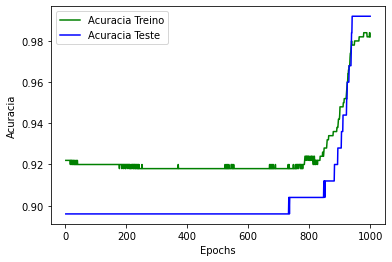

In [64]:
import matplotlib.pyplot as plt
acuraciatreino=historico.history['acc']
acuraciateste=historico.history['val_acc']
epocas=range(1,len(acuraciateste)+1) #+1 para começar do 1 e nao do 0
plt.plot(epocas, acuraciatreino, '-g', label='Acuracia Treino')
plt.plot(epocas, acuraciateste, '-b', label='Acuracia Teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acuracia')